In [1]:
import numpy as np
from numpy.linalg import inv
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import random

# 2a

In [2]:
R_A = np.array([[1, 0], [0, -1]])
R_B = np.array([[0, 1], [1, 0]])
P_A = np.array([[1, 0], [0, 0]])
P_B = np.array([[0.5, 0.5], [0.5, 0.5]])

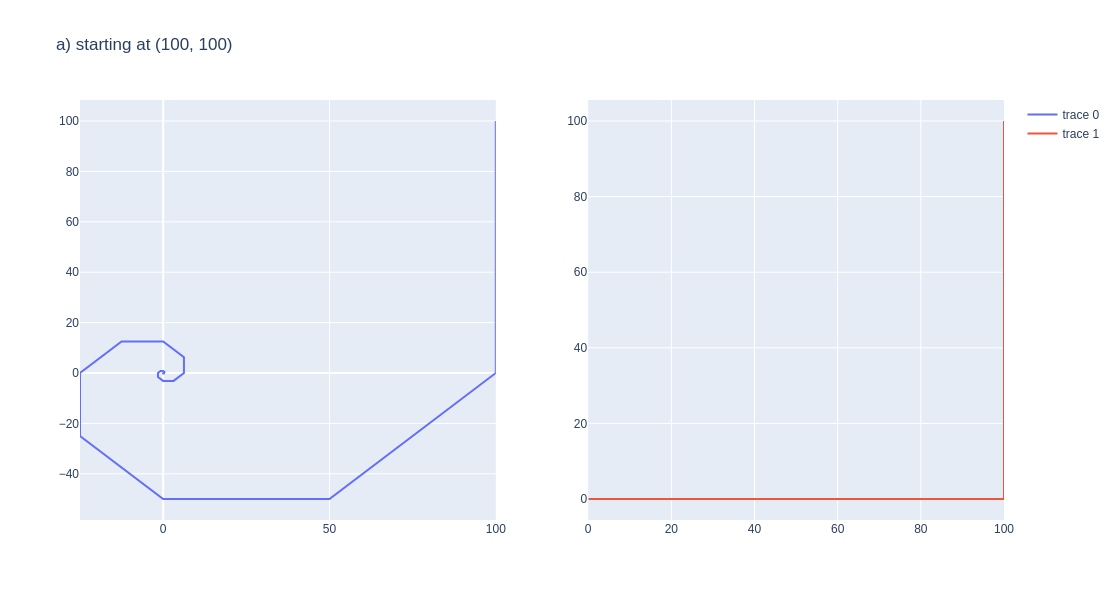

AP Convergence Rate: 0.5020710678118655
DR Convergence Rate: 0.7071067811865478


/tmp/ipykernel_22485/3236049298.py:44: RuntimeWarning:

invalid value encountered in scalar divide



In [3]:
dr_x1_array = []
dr_x2_array = []
ap_x1_array = []
ap_x2_array = []

x_ap = np.array([100., 100.])
x_dr = np.array([100., 100.])

dr_x1_array.append(x_dr[0])
dr_x2_array.append(x_dr[1])
ap_x1_array.append(x_ap[0])
ap_x2_array.append(x_ap[1])

for _ in range(1000):
    x_dr = ((R_A @ R_B @ x_dr) + x_dr)/2
    dr_x1_array.append(x_dr[0])
    dr_x2_array.append(x_dr[1])
    x_ap = P_A @ P_B @ x_ap
    ap_x1_array.append(x_ap[0])
    ap_x2_array.append(x_ap[1])

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=dr_x1_array, y=dr_x2_array),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ap_x1_array, y=ap_x2_array),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="a) starting at (100, 100)")
fig.show()

conv_rate_ap = []
conv_rate_dr = []

def norm(x1, x2):
    return np.sqrt((x1**2) + (x2**2))

for i in range(len(ap_x1_array)-1):
    conv_rate_ap.append(norm(ap_x1_array[i+1], ap_x2_array[i+1])/norm(ap_x1_array[i], ap_x2_array[i]))
    conv_rate_dr.append(norm(dr_x1_array[i+1], dr_x2_array[i+1])/norm(dr_x1_array[i], dr_x2_array[i]))
print("AP Convergence Rate: {}".format(np.mean(conv_rate_ap[:100])))
print("DR Convergence Rate: {}".format(np.mean(np.mean(conv_rate_dr[-100:]))))

Here, starting far away form the convergence point (0, 0) we can see that both algorithms converge.

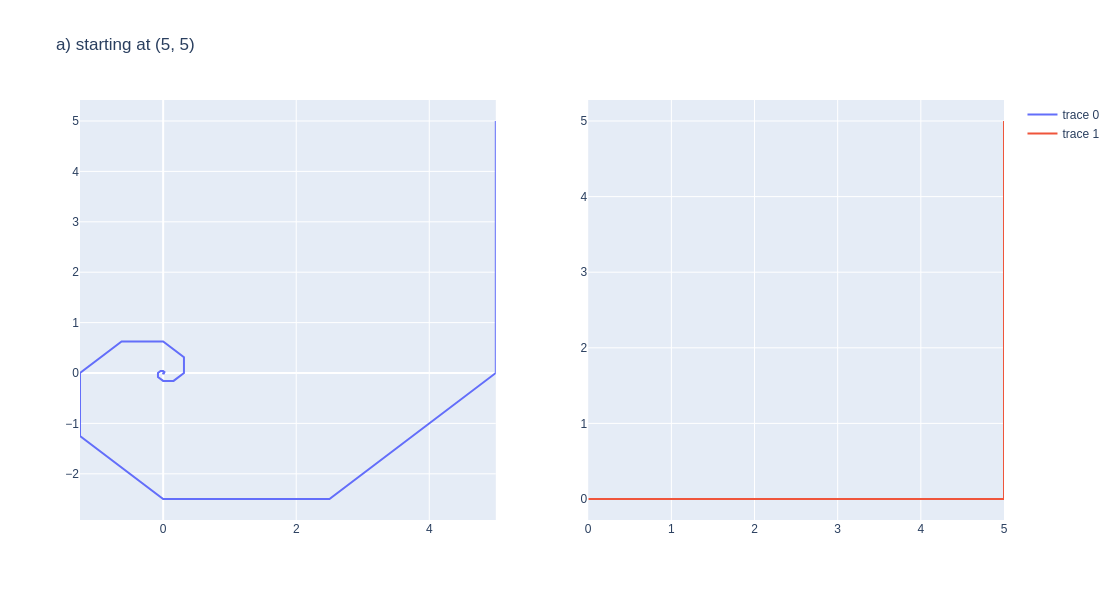

AP Convergence Rate: 0.5020710678118655
DR Convergence Rate: 0.7071067811865478


/tmp/ipykernel_22485/2080648823.py:41: RuntimeWarning:

invalid value encountered in scalar divide



In [4]:
dr_x1_array = []
dr_x2_array = []
ap_x1_array = []
ap_x2_array = []

x_ap = np.array([5., 5.])
x_dr = np.array([5., 5.])

dr_x1_array.append(x_dr[0])
dr_x2_array.append(x_dr[1])
ap_x1_array.append(x_ap[0])
ap_x2_array.append(x_ap[1])

for _ in range(1000):
    x_dr = ((R_A @ R_B @ x_dr) + x_dr)/2
    dr_x1_array.append(x_dr[0])
    dr_x2_array.append(x_dr[1])
    x_ap = P_A @ P_B @ x_ap
    ap_x1_array.append(x_ap[0])
    ap_x2_array.append(x_ap[1])

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=dr_x1_array, y=dr_x2_array),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ap_x1_array, y=ap_x2_array),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="a) starting at (5, 5)")
fig.show()

def norm(x1, x2):
    return np.sqrt((x1**2) + (x2**2))

for i in range(len(ap_x1_array)-1):
    conv_rate_ap.append(norm(ap_x1_array[i+1], ap_x2_array[i+1])/norm(ap_x1_array[i], ap_x2_array[i]))
    conv_rate_dr.append(norm(dr_x1_array[i+1], dr_x2_array[i+1])/norm(dr_x1_array[i], dr_x2_array[i]))
print("AP Convergence Rate: {}".format(np.mean(conv_rate_ap[:100])))
print("DR Convergence Rate: {}".format(np.mean(np.mean(conv_rate_dr[-100:]))))

Now starting closer to the convergence point, we still see both algorithms converging and therefore proximity having no effect on the result.

# 2b

In [5]:
R_A = np.array([[1, 0], [0, -1]])
P_A = np.array([[1, 0], [0, 0]])

def P_B(x):
    norm = np.sqrt((x[0]**2) + ((x[1]-1)**2))
    return np.array([x[0]/norm, ((x[1]-1)/norm) + 1])

def R_B(x):
    norm = np.sqrt((x[0]**2) + ((x[1]-1)**2))
    return np.array([(2*x[0]/norm) - x[0], 2*(((x[1]-1)/norm) + 1) - x[1]])

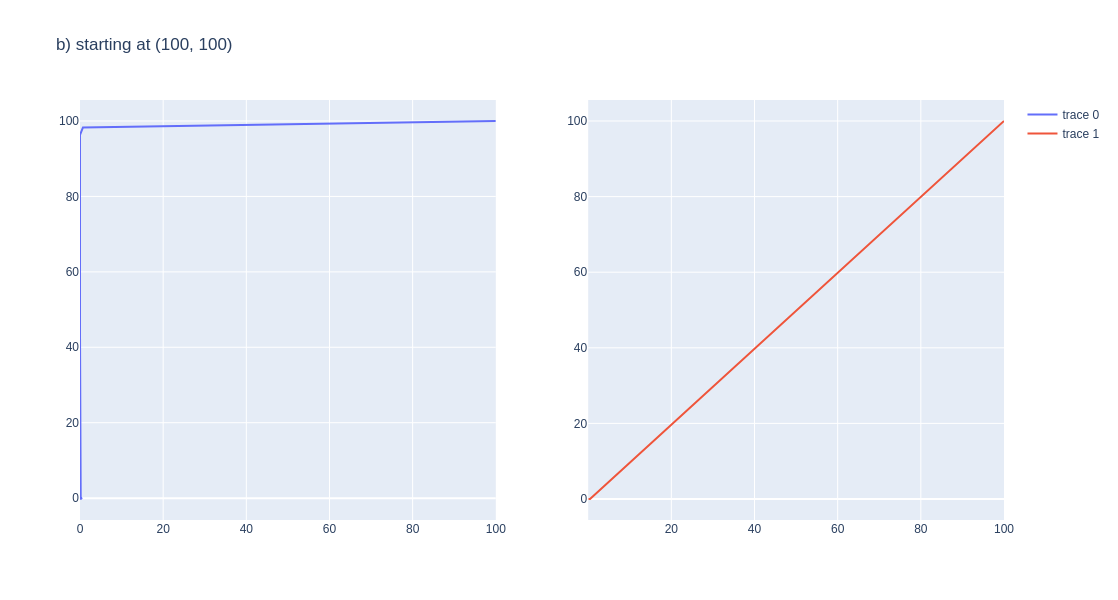

AP Convergence Rate: 0.9999497545326015
DR Convergence Rate: 1.0


In [6]:


dr_x1_array = []
dr_x2_array = []
ap_x1_array = []
ap_x2_array = []

x_ap = np.array([100., 100.])
x_dr = np.array([100., 100.])

dr_x1_array.append(x_dr[0])
dr_x2_array.append(x_dr[1])
ap_x1_array.append(x_ap[0])
ap_x2_array.append(x_ap[1])



for _ in range(10000):
    x_dr = ((R_A @ R_B(x_dr)) + x_dr)/2
    dr_x1_array.append(x_dr[0])
    dr_x2_array.append(x_dr[1])
    
    x_ap = P_A @ P_B(x_ap)
    ap_x1_array.append(x_ap[0])
    ap_x2_array.append(x_ap[1])

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=dr_x1_array, y=dr_x2_array),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ap_x1_array, y=ap_x2_array),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="b) starting at (100, 100)")
fig.show()

conv_rate_ap = []
conv_rate_dr = []

def norm(x1, x2):
    return np.sqrt((x1**2) + (x2**2))

for i in range(len(ap_x1_array)-1):
    conv_rate_ap.append(norm(ap_x1_array[i+1], ap_x2_array[i+1])/norm(ap_x1_array[i], ap_x2_array[i]))
    conv_rate_dr.append(norm(dr_x1_array[i+1], dr_x2_array[i+1])/norm(dr_x1_array[i], dr_x2_array[i]))
print("AP Convergence Rate: {}".format(np.mean(conv_rate_ap[-100:])))
print("DR Convergence Rate: {}".format(np.mean(np.mean(conv_rate_dr[-100:]))))

For 2b), when starting far from the feasible point, we see that the AP algorithm converges to the convergence point of (0, 0), however, the Douglas-Rachford algorithm does not completely, with x1 converging to 0 but x2 not completely.

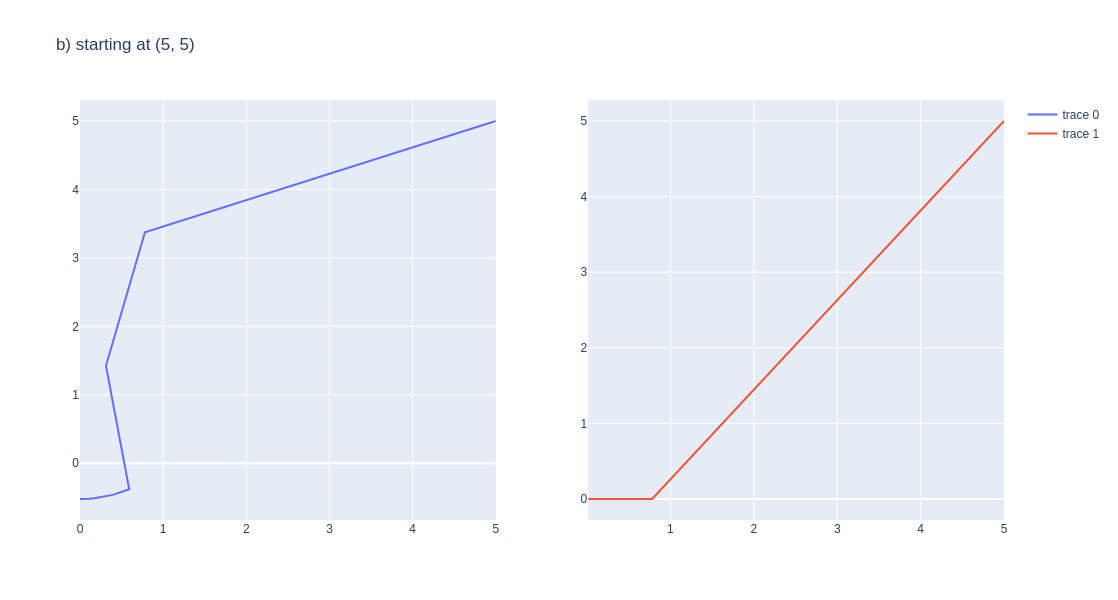

AP Convergence Rate: 0.9998990046234979
DR Convergence Rate: 1.0


In [7]:


dr_x1_array = []
dr_x2_array = []
ap_x1_array = []
ap_x2_array = []

x_ap = np.array([5., 5.])
x_dr = np.array([5., 5.])

dr_x1_array.append(x_dr[0])
dr_x2_array.append(x_dr[1])
ap_x1_array.append(x_ap[0])
ap_x2_array.append(x_ap[1])



for _ in range(5000):
    x_dr = (R_A @ R_B(x_dr) + x_dr)/2
    dr_x1_array.append(x_dr[0])
    dr_x2_array.append(x_dr[1])
    x_ap = P_A @ P_B(x_ap)
    ap_x1_array.append(x_ap[0])
    ap_x2_array.append(x_ap[1])

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=dr_x1_array, y=dr_x2_array),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ap_x1_array, y=ap_x2_array),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="b) starting at (5, 5)")
fig.show()

conv_rate_ap = []
conv_rate_dr = []

def norm(x1, x2):
    return np.sqrt((x1**2) + (x2**2))

for i in range(len(ap_x1_array)-1):
    conv_rate_ap.append(norm(ap_x1_array[i+1], ap_x2_array[i+1])/norm(ap_x1_array[i], ap_x2_array[i]))
    conv_rate_dr.append(norm(dr_x1_array[i+1], dr_x2_array[i+1])/norm(dr_x1_array[i], dr_x2_array[i]))
print("AP Convergence Rate: {}".format(np.mean(conv_rate_ap[-100:])))
print("DR Convergence Rate: {}".format(np.mean(np.mean(conv_rate_dr[-100:]))))

When starting closer to the convergence point, we see again that the AP algorithm converges to the convergence point, whilst for the DR-Algorithm only x1 converges completely, with x2 settling further away this time from 0 than the previously when starting from a point further away. We conclude that proximity may have some effect on the result for the DR algorithm. 

# 2C

In [8]:
R_B = np.array([[0, 1], [1, 0]])
P_B = np.array([[0.5, 0.5], [0.5, 0.5]])

def P_A(x):
    if random.uniform(0, 1) > 0.5:
        return np.array([x[0], 0])
    else:
        return np.array([0, x[1]])

def R_A(x):
    if random.uniform(0, 1) > 0.5:
        return np.array([x[0], -x[1]])
    else:
        return np.array([-x[0], x[1]])

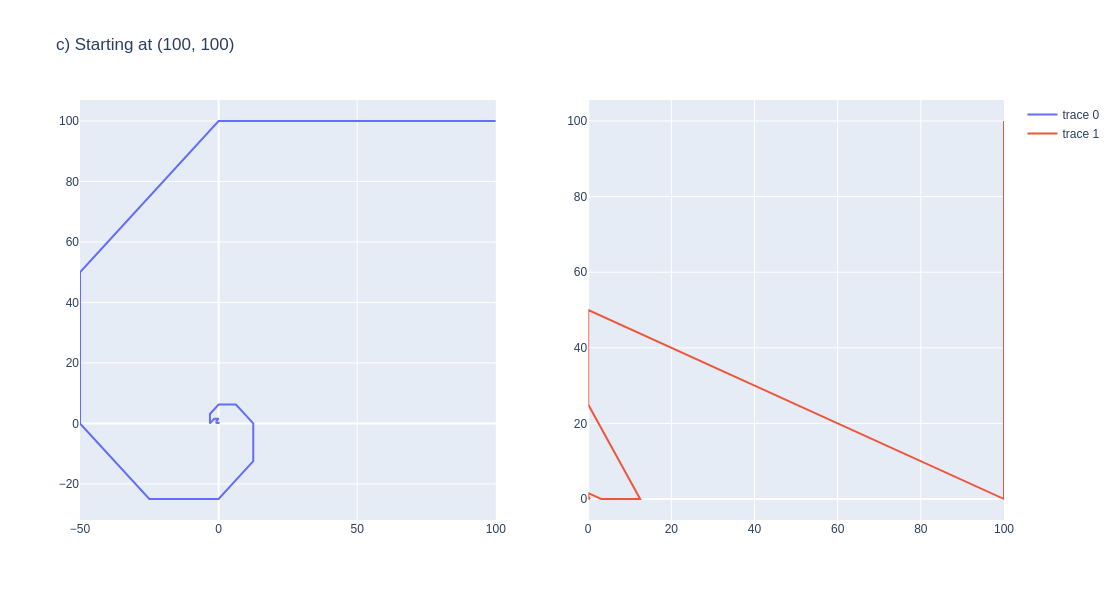

AP Convergence Rate: 0.5020710678118655
DR Convergence Rate: 0.7071067811865478


/tmp/ipykernel_22485/1527211742.py:44: RuntimeWarning:

invalid value encountered in scalar divide

/tmp/ipykernel_22485/1527211742.py:45: RuntimeWarning:

invalid value encountered in scalar divide



In [9]:

x_ap = np.array([100., 100.])
x_dr = np.array([100., 100.])

dr_x1_array = []
dr_x2_array = []
ap_x1_array = []
ap_x2_array = []

dr_x1_array.append(x_dr[0])
dr_x2_array.append(x_dr[1])
ap_x1_array.append(x_ap[0])
ap_x2_array.append(x_ap[1])

for _ in range(2000):
    x_dr = (R_A(R_B @ x_dr) + x_dr)/2
    dr_x1_array.append(x_dr[0])
    dr_x2_array.append(x_dr[1])
    x_ap = P_A(P_B @ x_ap)
    ap_x1_array.append(x_ap[0])
    ap_x2_array.append(x_ap[1])

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=dr_x1_array, y=dr_x2_array),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ap_x1_array, y=ap_x2_array),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="c) Starting at (100, 100)")
fig.show()

conv_rate_ap = []
conv_rate_dr = []

def norm(x1, x2):
    return np.sqrt((x1**2) + (x2**2))

for i in range(len(ap_x1_array)-1):
    conv_rate_ap.append(norm(ap_x1_array[i+1], ap_x2_array[i+1])/norm(ap_x1_array[i], ap_x2_array[i]))
    conv_rate_dr.append(norm(dr_x1_array[i+1], dr_x2_array[i+1])/norm(dr_x1_array[i], dr_x2_array[i]))
print("AP Convergence Rate: {}".format(np.mean(conv_rate_ap[:100])))
print("DR Convergence Rate: {}".format(np.mean(np.mean(conv_rate_dr[:100]))))

Now looking at 2c) when starting far away, we have both algorithms converging to the convergence point (0, 0).

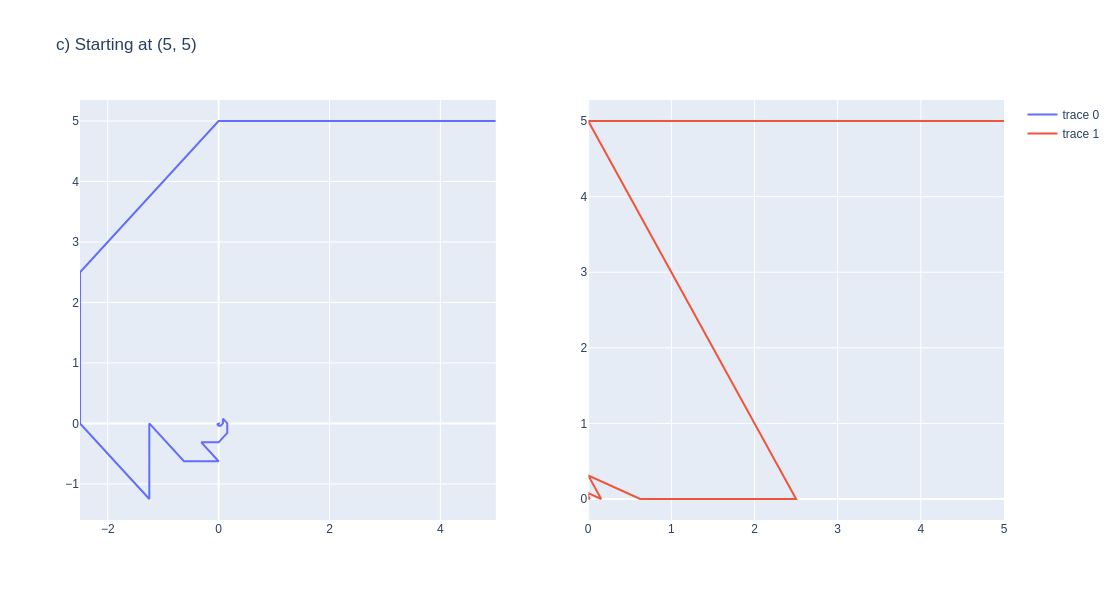

AP Convergence Rate: 0.5020710678118655
DR Convergence Rate: 0.7071067811865478


/tmp/ipykernel_22485/3892360340.py:44: RuntimeWarning:

invalid value encountered in scalar divide

/tmp/ipykernel_22485/3892360340.py:45: RuntimeWarning:

invalid value encountered in scalar divide



In [10]:
x_ap = np.array([5., 5.])
x_dr = np.array([5., 5.])

dr_x1_array = []
dr_x2_array = []
ap_x1_array = []
ap_x2_array = []

dr_x1_array.append(x_dr[0])
dr_x2_array.append(x_dr[1])
ap_x1_array.append(x_ap[0])
ap_x2_array.append(x_ap[1])

for _ in range(2000):
    x_dr = (R_A(R_B @ x_dr) + x_dr)/2
    dr_x1_array.append(x_dr[0])
    dr_x2_array.append(x_dr[1])
    x_ap = P_A(P_B @ x_ap)
    ap_x1_array.append(x_ap[0])
    ap_x2_array.append(x_ap[1])

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=dr_x1_array, y=dr_x2_array),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ap_x1_array, y=ap_x2_array),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="c) Starting at (5, 5)")
fig.show()

conv_rate_ap = []
conv_rate_dr = []

def norm(x1, x2):
    return np.sqrt((x1**2) + (x2**2))

for i in range(len(ap_x1_array)-1):
    conv_rate_ap.append(norm(ap_x1_array[i+1], ap_x2_array[i+1])/norm(ap_x1_array[i], ap_x2_array[i]))
    conv_rate_dr.append(norm(dr_x1_array[i+1], dr_x2_array[i+1])/norm(dr_x1_array[i], dr_x2_array[i]))
print("AP Convergence Rate: {}".format(np.mean(conv_rate_ap[:100])))
print("DR Convergence Rate: {}".format(np.mean(np.mean(conv_rate_dr[:100]))))


when starting closer, we again have both algorithms converging to the convergence point (0, 0), and hence proximity having no effect on the result.

# 2d

In [11]:
def P_A(x):
    return np.array([x[0], np.sqrt(2)/2])

def R_A(x):
    return np.array([x[0], np.sqrt(2) - x[1]])

def P_B(x):
    norm = np.sqrt((x[0]**2) + (x[1]**2))
    return np.array([x[0]/norm, x[1]/norm])

def R_B(x):
    norm = np.sqrt((x[0]**2) + (x[1]**2))
    return np.array([(2*x[0]/norm) - x[0], (2*x[1]/norm) - x[1]])
    

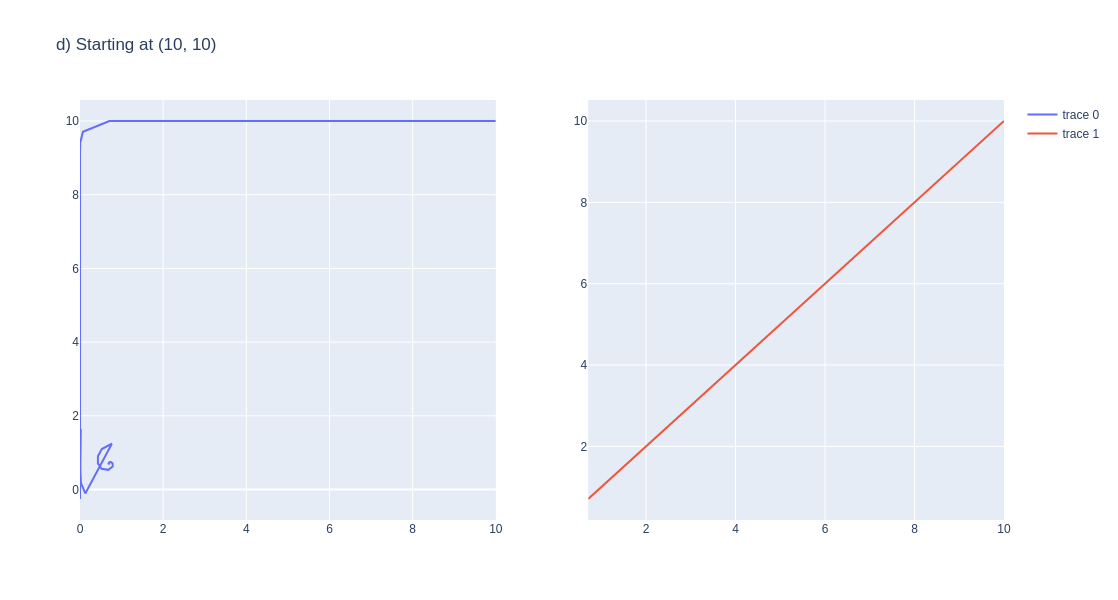

AP Convergence Rate: 1.0
DR Convergence Rate: 1.0


In [12]:

x_ap = np.array([10., 10.])
x_dr = np.array([10., 10.])

dr_x1_array = []
dr_x2_array = []
ap_x1_array = []
ap_x2_array = []

dr_x1_array.append(x_dr[0])
dr_x2_array.append(x_dr[1])
ap_x1_array.append(x_ap[0])
ap_x2_array.append(x_ap[1])

for _ in range(5000):
    x_dr = (R_A(R_B(x_dr)) + x_dr)/2
    dr_x1_array.append(x_dr[0])
    dr_x2_array.append(x_dr[1])
    x_ap = P_A(P_B(x_ap))
    ap_x1_array.append(x_ap[0])
    ap_x2_array.append(x_ap[1])

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=dr_x1_array, y=dr_x2_array),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ap_x1_array, y=ap_x2_array),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="d) Starting at (10, 10)")
fig.show()

conv_rate_ap = []
conv_rate_dr = []

def norm(x1, x2):
    return np.sqrt((x1**2) + (x2**2))

for i in range(len(ap_x1_array)-1):
    conv_rate_ap.append(norm(ap_x1_array[i+1] - 1/np.sqrt(2), ap_x2_array[i+1]  - 1/np.sqrt(2))/norm(ap_x1_array[i]  - 1/np.sqrt(2), ap_x2_array[i]  - 1/np.sqrt(2)))
    conv_rate_dr.append(norm(dr_x1_array[i+1] - 1/np.sqrt(2), dr_x2_array[i+1] - 1/np.sqrt(2))/norm(dr_x1_array[i] - 1/np.sqrt(2), dr_x2_array[i] - 1/np.sqrt(2)))
print("AP Convergence Rate: {}".format(np.mean(conv_rate_ap[-100:])))
print("DR Convergence Rate: {}".format(np.mean(np.mean(conv_rate_dr[-100:]))))

For 2d) first when starting further away from the convergence point ($\frac{1}{\sqrt{2}}$, $\frac{1}{\sqrt{2}}$), we have both algorithms converging.

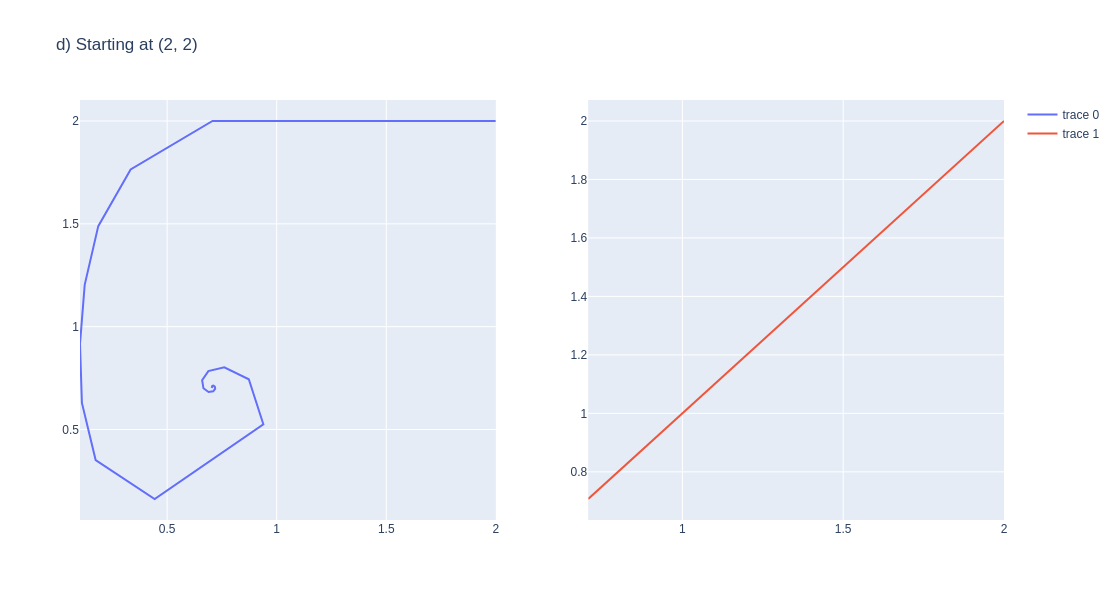

AP Convergence Rate: 1.0
DR Convergence Rate: 1.0


/tmp/ipykernel_22485/129763732.py:45: RuntimeWarning:

divide by zero encountered in scalar divide



In [13]:

x_ap = np.array([2., 2.])
x_dr = np.array([2., 2.])

dr_x1_array = []
dr_x2_array = []
ap_x1_array = []
ap_x2_array = []

dr_x1_array.append(x_dr[0])
dr_x2_array.append(x_dr[1])
ap_x1_array.append(x_ap[0])
ap_x2_array.append(x_ap[1])

for _ in range(5000):
    x_dr = (R_A(R_B(x_dr)) + x_dr)/2
    dr_x1_array.append(x_dr[0])
    dr_x2_array.append(x_dr[1])
    x_ap = P_A(P_B(x_ap))
    ap_x1_array.append(x_ap[0])
    ap_x2_array.append(x_ap[1])

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=dr_x1_array, y=dr_x2_array),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ap_x1_array, y=ap_x2_array),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="d) Starting at (2, 2)")
fig.show()

conv_rate_ap = []
conv_rate_dr = []

def norm(x1, x2):
    return np.sqrt((x1**2) + (x2**2))

for i in range(len(ap_x1_array)-1):
    conv_rate_ap.append(norm(ap_x1_array[i+1] - 1/np.sqrt(2), ap_x2_array[i+1]  - 1/np.sqrt(2))/norm(ap_x1_array[i]  - 1/np.sqrt(2), ap_x2_array[i]  - 1/np.sqrt(2)))
    conv_rate_dr.append(norm(dr_x1_array[i+1] - 1/np.sqrt(2), dr_x2_array[i+1] - 1/np.sqrt(2))/norm(dr_x1_array[i] - 1/np.sqrt(2), dr_x2_array[i] - 1/np.sqrt(2)))
print("AP Convergence Rate: {}".format(np.mean(conv_rate_ap[-100:])))
print("DR Convergence Rate: {}".format(np.mean(np.mean(conv_rate_dr[-100:]))))

when starting closer to the convergence point ($\frac{1}{\sqrt{2}}$, $\frac{1}{\sqrt{2}}$), we have both algorithms again converging, and therefore proximity having no effect on the result.